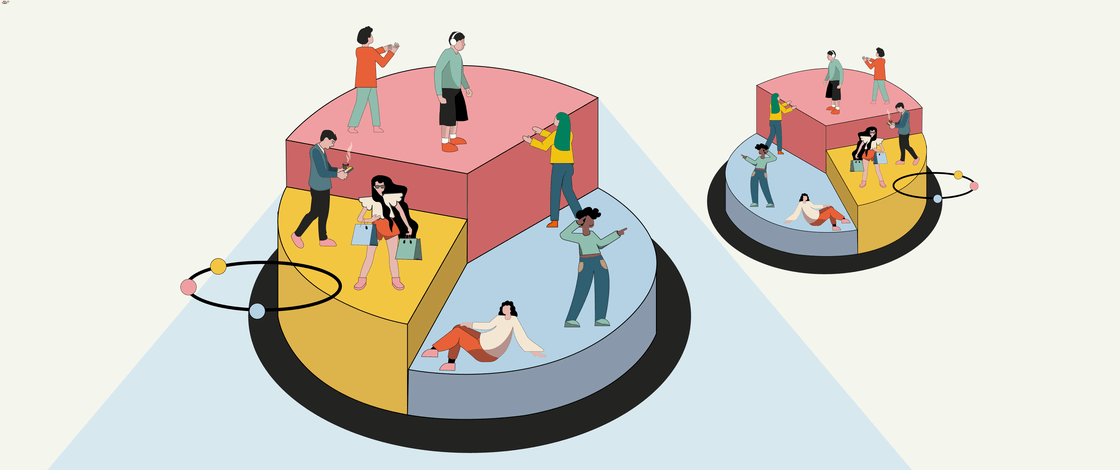

In [1]:
from IPython.display import Image
Image(filename='image.png')

# SegmentSavvy

**Revolutionizing the Shopping Experience for Bicycle Enthusiasts**

Dionne Taylor, Adam Harris, Edward Michaud, Caroline Miller

O'Neil Cohort - Data Science

June 16, 2023

**Project Goal:**  The endstate for this project includes three components:  1) Clustering Model which identifies like-minded customers based off of their purchasing power, historical item purchases, and customer age, 2) Classification Model which can identify the cluster in which a customer's transaction can be segmented, and 3) Recommender System which can link the cluster of a customer with a Amazon product which fits the customer's potential interests and budget. The project acts as proof of concept which can be summarized as using consumer sales data for particular categories of goods, in this case cycling equipment, from smaller businesses to feed marketing decisions for a global, ecommerce company like Amazon which sells a vast scope of products. 

**Project Description:** The project combines two overarching concepts and technologies:  1) customer segementation and 2) product recommendation. The first concept uses a dataset from a small cycling retailor which serves online customers from the United States, the United Kingdom, France, and Germany. The cycling shop sells primarily bikes, accessories, and clothing. Clustering is used to compile similar transactions based on purchasing power (amount spent), category of item purchased, and customer age. These clusters of transactions serve to illustrate distinct customer types. Classification machine learning is then used to cluster transactions based on demographic data as well as transactional data. The second concept uses a dataset which acts as an inventory list for cyling products which Amazon offers. Natural Language Processing techniques to further categorize the cycling product list to fit the clusters of customer types. The customer types from clustering coalesce with the sub-categories of Amazon cycling products in a recommender system which matches appropriate Amazon products to customers based on their interests, past purchases, and inferred budget. 

**Project Purpose:** Online consumers use Amazon to buy affordable, convenient products of a wide variety. Amazon makes online shopping easy and expedient. A wide variety of products can prove to be overwhelming for consumers especially if the consumer is looking for a specific product. There are multiple sports, hobbies, and jobs that require specialized expertise and personizalization when choosing products. Some of these activities include mountain climbing, cycling, backpacking, fishing, and equestrianism. People who engage in these kinds of activities are highly skilled and particular about the brands and products they use. The question this project aims to answer is can an online retailor with an immense assortment of products create a boutique style of personalized product recommendations to customers whose purchases revolve around niche and exclusive themes such as cycling? With artificial intelligence and machine learning, personalized customer segementation can be used to tailor online commerse to accomplish this goal. 

### Data Dictionary

**Dataset 1: Bicycle Sales Data**

| **Object Returned** | **Description** |
|:-------------------|:--------------------------------|
| 1. date | date of transaction (datetime) |
| 2. year | year of transaction (object) |
| 3. month | month of transaction (integer) |
| 4. customer_age |  age of the customer at the time of purchase (Float) |
| 5. customer_gender | gender of customer (female/male) |
| 6. country | country of origin of customer (object) |
| 7. state | state or province of customer (Float)  |
| 8. product_category | broad category of item purchased (object)   |
| 9. sub_category | descriptive category of item purchased(object)   |
| 10. quantity | the number of products purchased for the transaction (Float)  |
| 11. unit_cost | price which the store paid per item purhased in transaction (Float)  |
| 12. unit_price | price which the customer paid per item purchased in transaction (float)   |
| 13. cost | total prie the store paid for the quantity of item purchased in transaction(float)   |
| 14. revenue | total revenue accrued for the quantity  of items purchaseed in transaction (Float)  |

**Dataset 2: Amazon Cycling Product Data**

| **Object Returned** | **Description** |
|:-------------------|:--------------------------------|
| 1. | name	The name of the product |
| 2. | main_category	The main category of the product belong |
| 3. | sub_category	The main category of the product belong |
| 4. | image	The image of the product look like |
| 5. | link	The amazon website reference link of the product |
| 6. | ratings	The ratings given by amazon customers of the product |
| 7. | no of ratings	The number of ratings given to this product in amazon shopping |
| 8. | discount_price	The discount prices of the product |
| 9. | actual_price	The actual MRP of the product |

### Imports

In [2]:
import numpy as np
import pandas as pd
import wrangle as w
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import modeling_classification as m
import warnings
warnings.filterwarnings("ignore")

Opening data from local file.
Cluster 1 Mean:
customer_age                       28.105851
sub_category_Bike Stands            0.001808
sub_category_Bottles and Cages      0.254438
sub_category_Caps                   0.076677
sub_category_Cleaners               0.024737
sub_category_Fenders                0.019888
sub_category_Gloves                 0.012410
sub_category_Helmets                0.048159
sub_category_Hydration Packs        0.004356
sub_category_Jerseys                0.024901
sub_category_Mountain Bikes         0.003698
sub_category_Road Bikes             0.001890
sub_category_Shorts                 0.005999
sub_category_Socks                  0.017751
sub_category_Tires and Tubes        0.499178
sub_category_Touring Bikes          0.000247
sub_category_Vests                  0.002794
revenue                           179.097304
dtype: float64

Cluster 2 Mean:
customer_age                       48.486637
sub_category_Bike Stands            0.003155
sub_category_Bottles a

## Acquire


- The Bicycle Shop Sales Dataset was acquired from data.world


    - The wrangle.py file located in the project repository contains an aqcuire function which can be used. The function will either save a local copy of the dataset as a csv file to your local directory or it will read the file from the link into a pandas dataframe. 

    - The dataset was uploaded by the author six years ago, 2018

    - This project acquired the data in 2023

    - The dataset in its unclean form contains 34,867 rows (transactions) and 15 columns
    

- The Amazon Cycling Product Data was acquired from Kaggle.com


    - The dataset was loaded onto Kaggle.com in 2023
    
    - The dataset was scraped from Amazon.com (License: https://creativecommons.org/licenses/by-nc/4.0/)
    
    - The dataset in its unclean form contains 1,152 rows each representing one item in Amazon's cycling inventory and 9 columns

In [3]:
# calling the acquire_data() function from the wrangle.py module which loads the bicycle shop dataset

df = w.acquire_data()

Opening data from local file.


In [4]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


## Prepare


When called, the wrangle_data() function from the wrangle.py module actions the following steps:

    - Takes in the dataframe from acquire_data()
    - Lowercased the column names
    - replaces spaces with underscores in the column names
    - The datatype of column 'year' changed to int 
    - The datatype of column 'customer_age' changed to int
    - The datatype of column 'quantity' changed to int
    - The numeric values in columns 'unit_cost', 'unit_price', 'cost', and 'revenue' rounded to represent monetary value
    - The categorical columns 'sub_category', 'customer_gender', and 'country' one_hot_encoded
    - The categorical column 'product_category' label encoded 
    - Dataframe split into train, validate, and test dataset to prevent overfitting and prepare train for exploration
    
**Note:**  Null values were dropped from the dataframe. There was onw row with null values. This may have been input error and therefore the transaction record was removed.

In [5]:
df, train, validate, test = w.wrangle_data()

Opening data from local file.


After cleaning the data, the second aspect of data preparation is to model clusters and add them as a column in the dataframe as the target variable. 

In [6]:
# Taking the claned dataframe from wrangle_data(), the function k_means_clustering(k) is called with k
# being the specified number of clusters. The returned dataframe includes the clusters column

df = w.k_means_clustering(k=4)

Opening data from local file.
Cluster 1 Mean:
customer_age                       28.105851
sub_category_Bike Stands            0.001808
sub_category_Bottles and Cages      0.254438
sub_category_Caps                   0.076677
sub_category_Cleaners               0.024737
sub_category_Fenders                0.019888
sub_category_Gloves                 0.012410
sub_category_Helmets                0.048159
sub_category_Hydration Packs        0.004356
sub_category_Jerseys                0.024901
sub_category_Mountain Bikes         0.003698
sub_category_Road Bikes             0.001890
sub_category_Shorts                 0.005999
sub_category_Socks                  0.017751
sub_category_Tires and Tubes        0.499178
sub_category_Touring Bikes          0.000247
sub_category_Vests                  0.002794
revenue                           179.097304
dtype: float64

Cluster 2 Mean:
customer_age                       48.486637
sub_category_Bike Stands            0.003155
sub_category_Bottles a

In [7]:
# Taking the dataframe from the above function, the function clean_split_df(df) is called to split the data 
# into train, validate, and test, and removing the one_hot_encoded columns

train, validate, test = w.clean_split_df(df)

## Exploratory Data Analysis

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

### Initial Questions 


1. On average, is the reveneue of each of the customer segemnts different from one another? Are any of segmented customers spending more? Are there any distinguishable demographic information of customer segments who spend more? What types of products are they buying?


2. Does the average age of the customers among the clusters differ?


3. Are there any sub-categories of products that customers of specific genders are purchasing? What are they?


4. Between road, mountain, and touring bikes, are customers in specific geographical areas buying more of these types of bikes? Does the age differ between the customers who purchase these types of bikes? Do people of different gender purchase one type of bike more than the other?


5. Proportional to a nation's population, does one country purchase more items than the others? What are they buying if so, and how much are they spending?


6. What are the distinct characteristics of the four clusters of customers? What is the most influential driver(s) of segmenting customers?



**Question 1:**  On average, is the reveneue of each of the customer segemnts different from one another? Are any of segmented customers spending more? Are there any distinguishable demographic information of customer segments who spend more? What types of products are they buying?

    Revenue is right-skewed continuous, cluster is categorical

    We will be using an ANOVA test to evaluate if the mean revenue value differs among the clusters

- H$_0$ - There is no difference in mean revenue amongst each customer cluster
- H$_a$ - The mean revenue value is different for each customer cluster

In [8]:
# creating dataframes specific to each of the four clusters

clus_0 = train[train.clusters == 0]
clus_1 = train[train.clusters == 1]
clus_2 = train[train.clusters == 2]
clus_3 = train[train.clusters == 3]

In [9]:
# check if revenue variances are equal among each cluster
# we will be using a levene test to check if variances are equal
# p-value < 0.05 indicates equal variaces

print(f'cluster 0 varaince to total :{stats.levene(clus_0.revenue, train.revenue)}')
print(f'cluster 1 varaince to total :{stats.levene(clus_1.revenue, train.revenue)}')
print(f'cluster 2 varaince to total :{stats.levene(clus_2.revenue, train.revenue)}')
print(f'cluster 3 varaince to total :{stats.levene(clus_3.revenue, train.revenue)}')

cluster 0 varaince to total :LeveneResult(statistic=2924.285980067805, pvalue=0.0)
cluster 1 varaince to total :LeveneResult(statistic=1210.923401129176, pvalue=2.8907730241682007e-259)
cluster 2 varaince to total :LeveneResult(statistic=721.2304298854948, pvalue=1.5739480018476525e-156)
cluster 3 varaince to total :LeveneResult(statistic=261.27918246515077, pvalue=1.9628657971576157e-58)


Looks like the revenue variances are equal among the clusters, lets proceed with ANOVA test

In [10]:
def check_hypothesis_anova(a, b, c, d,  α=0.05):
    f, p = stats.f_oneway(a, b, c, d)
    
    
    if p < α:
        print('\033[32m========== REJECT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')
        print(f'\033[35mF-Value:\033[0m {f:.8f}')
    else:
        print('\033[31m========== ACCEPT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')

In [11]:
# anova test is stats.f_oneway
check_hypothesis_anova(clus_0.revenue, clus_1.revenue, clus_2.revenue, clus_3.revenue)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
F-Value: 33539.63583859


The ANOVA test suggests that there is a difference in the mean value of revenue among each cluster.

**What is each segment paying on average?**

In [12]:
print(f'cluster 0 average revenue is: {clus_0.revenue.mean()}')
print(f'cluster 1 average revenue is: {clus_1.revenue.mean()}')
print(f'cluster 2 average revenue is: {clus_2.revenue.mean()}')
print(f'cluster 3 average revenue is: {clus_3.revenue.mean()}')

cluster 0 average revenue is: 179.4459935427062
cluster 1 average revenue is: 321.2502485913159
cluster 2 average revenue is: 894.4546530902202
cluster 3 average revenue is: 2274.291887484713


**Which segment pays the most / least?**

Cluster 3 pays the most, with an avg revenue of \$ 2276.82

Cluster 0 pays the least, with an avg revenue of \$ 179.51

In [13]:
def get_revenue_by_subcat():
    ''' Gets boxplots of acquired continuous variables'''

    cluster_0 = train[train.clusters == 0]
    cluster_1 = train[train.clusters == 1]
    cluster_2 = train[train.clusters == 2]
    cluster_3 = train[train.clusters == 3]
    
    clusters = [cluster_0, cluster_1, cluster_2, cluster_3]
    
    plt.figure(figsize=(15, 30))

    for i, cluster in enumerate(clusters):
        
        plot_number = i + 1 
        
        # Create subplot.
        plt.subplot(len(clusters), 1, plot_number)

        # Title with column name.
        plt.title(f'Comparing Counts of Transactions by Country for cluster_{i}')

        # Display boxplot for column.
        sns.boxplot(x=cluster['sub_category'], y=cluster['revenue'], palette='crest')
        
        plt.xticks(rotation=45)
        
        # using padding
        plt.tight_layout(pad=5.0)
        
        # Hide gridlines.
        plt.grid(False)

    plt.show()

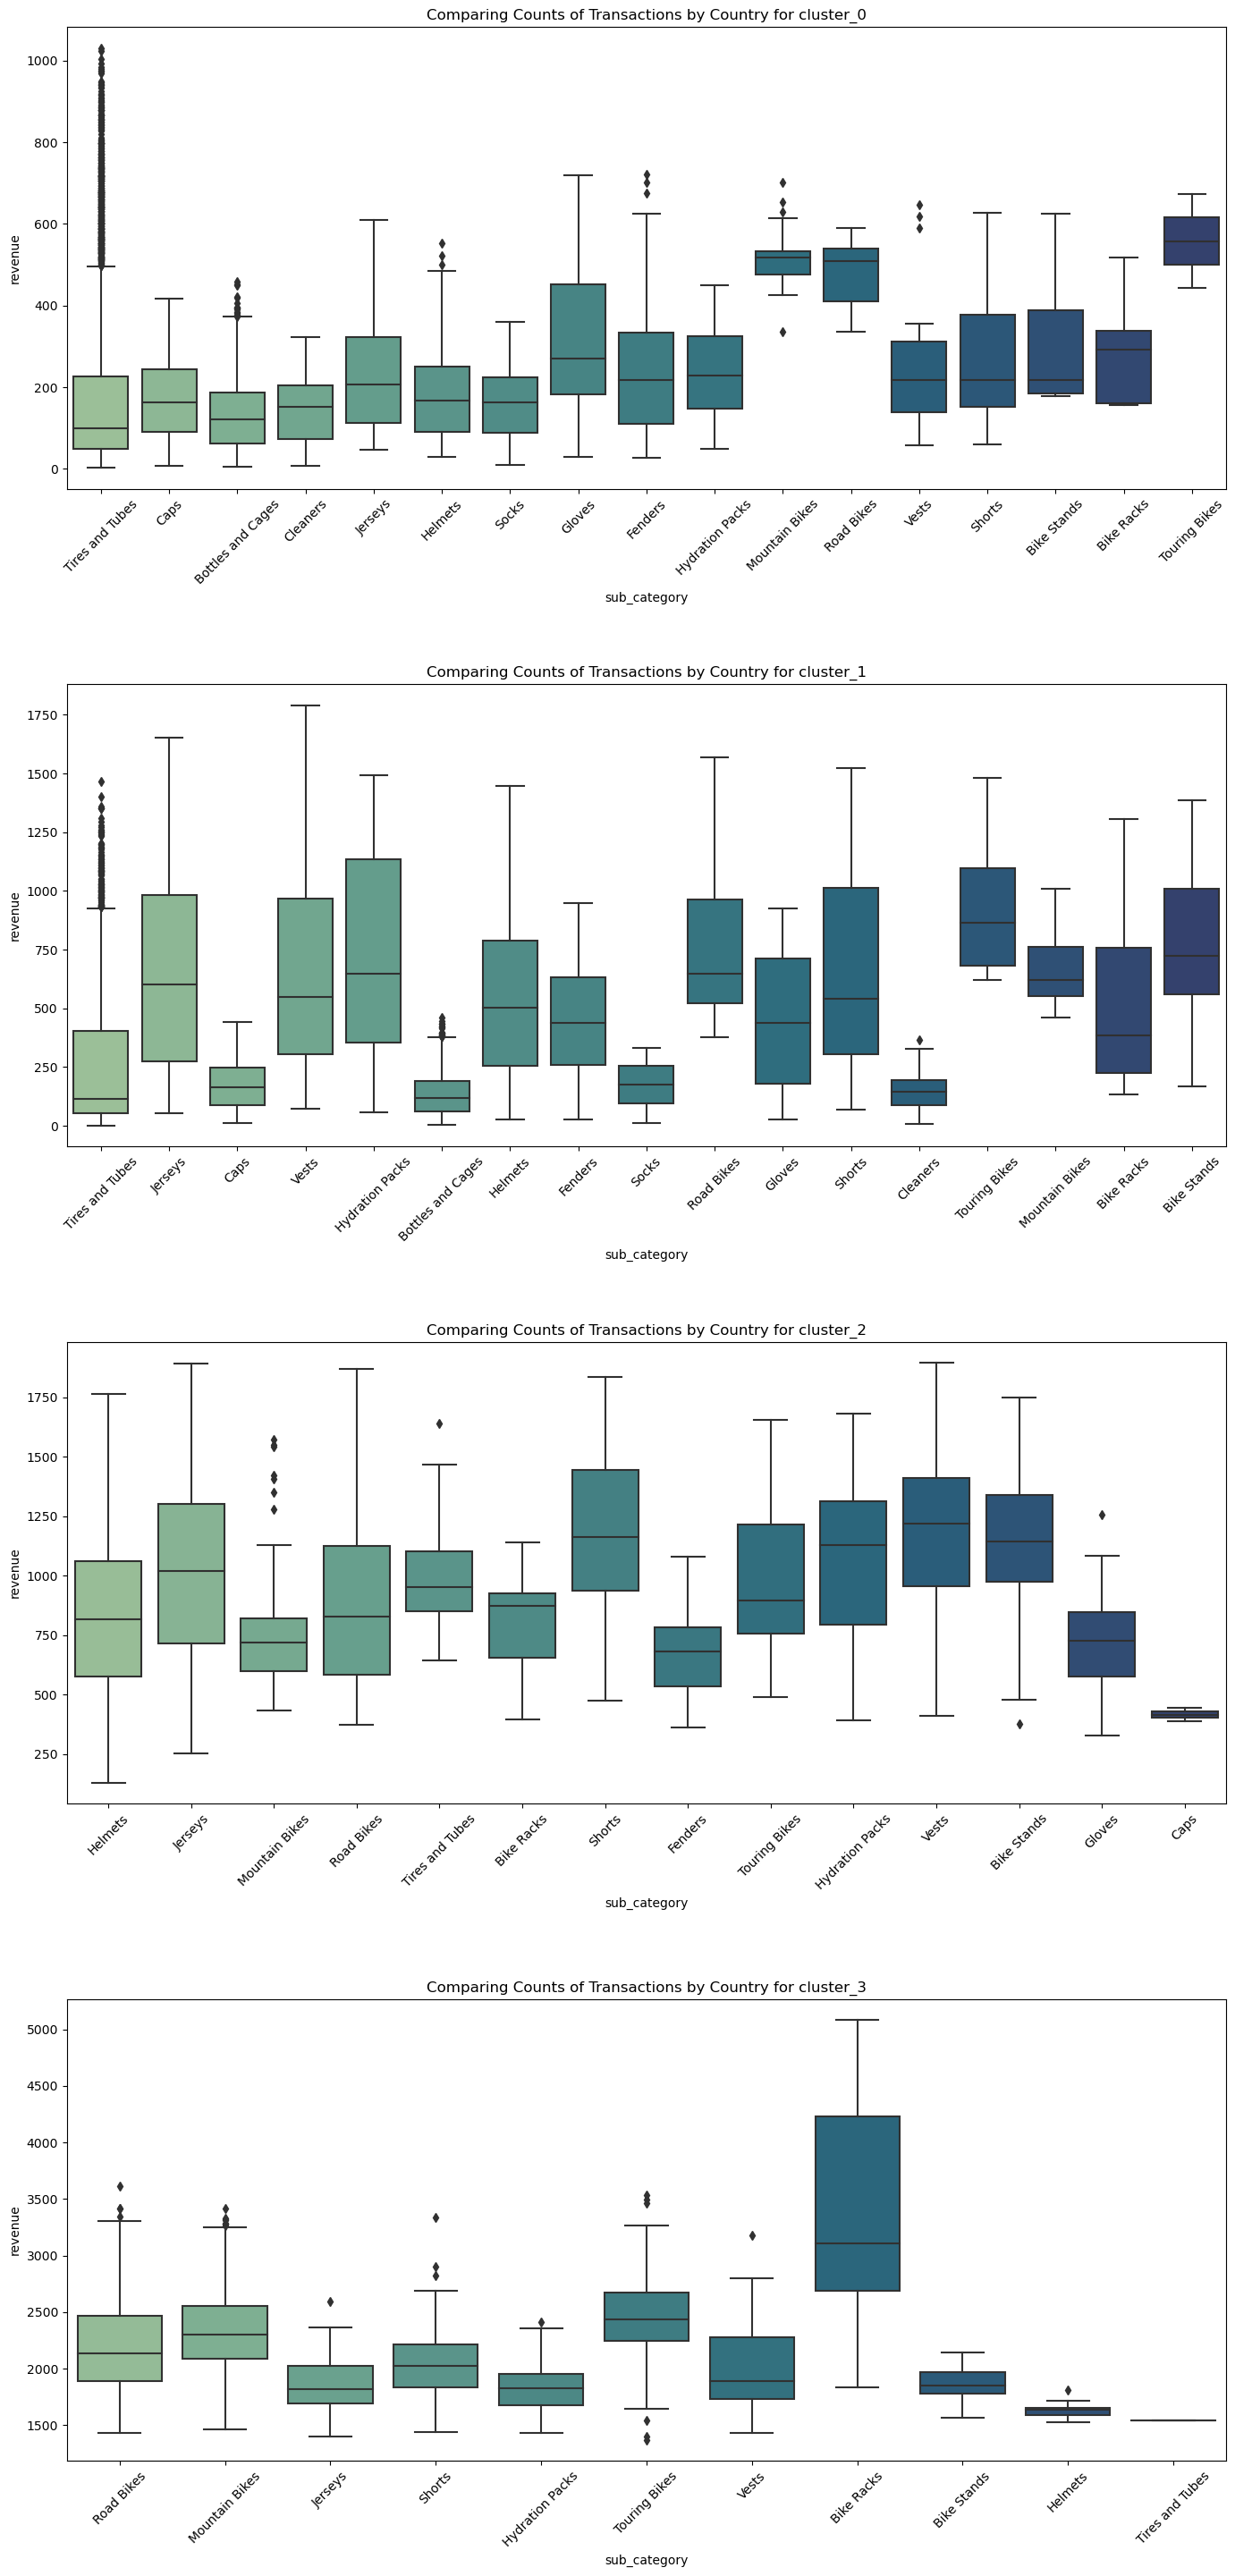

In [14]:
get_revenue_by_subcat()

**Question 2:**  Does the average age of the customers among the clusters differ?

- H$_0$ - The mean value of age is the same amongst each customer cluster
- H$_a$ - The mean value of age is different amongst different customer clusters

    Age is right-skewed continuous, cluster is categorical

    We will be using an ANOVA test to evaluate if the mean age value differs among the clusters

In [15]:
# check if customer_age variances are equal among each cluster
# we will be using a levene test to check if variances are equal
# p-value < 0.05 indicates equal variaces
print(f'cluster 0 varaince to total :\
    {stats.levene(clus_0.customer_age, train.customer_age)}')
print(f'cluster 1 varaince to total :\
    {stats.levene(clus_1.customer_age, train.customer_age)}')
print(f'cluster 2 varaince to total :\
    {stats.levene(clus_2.customer_age, train.customer_age)}')
print(f'cluster 3 varaince to total :\
    {stats.levene(clus_3.customer_age, train.customer_age)}')

cluster 0 varaince to total :    LeveneResult(statistic=2304.8151680598694, pvalue=0.0)
cluster 1 varaince to total :    LeveneResult(statistic=1302.1606134141214, pvalue=3.652089678142497e-278)
cluster 2 varaince to total :    LeveneResult(statistic=1304.7994370199215, pvalue=3.4086975881005596e-278)
cluster 3 varaince to total :    LeveneResult(statistic=52.122334518405175, pvalue=5.384592098699269e-13)


Looks like the revenue variances are equal among the clusters, lets proceed with ANOVA test

In [16]:
# anova test is stats.f_oneway
check_hypothesis_anova(clus_0.customer_age, 
                       clus_1.customer_age, 
                       clus_2.customer_age, 
                       clus_3.customer_age)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
F-Value: 9925.11354908


The ANOVA test suggests that there is a difference in the mean value of customer_age among the different clusters

**If there is a difference of mean age, in which cluster are the age groups located?**

In [17]:
print(f'cluster 0 average customer_age is: {clus_0.customer_age.mean()}')
print(f'cluster 1 average customer_age is: {clus_1.customer_age.mean()}')
print(f'cluster 2 average customer_age is: {clus_2.customer_age.mean()}')
print(f'cluster 3 average customer_age is: {clus_3.customer_age.mean()}')

cluster 0 average customer_age is: 28.055767537422952
cluster 1 average customer_age is: 48.49618826648989
cluster 2 average customer_age is: 31.56902675822875
cluster 3 average customer_age is: 37.91928251121076


Cluster 0 is the youngest, with a mean age of 28.1. 

Cluster 1 is the oldest, with a mean age of 48.5 

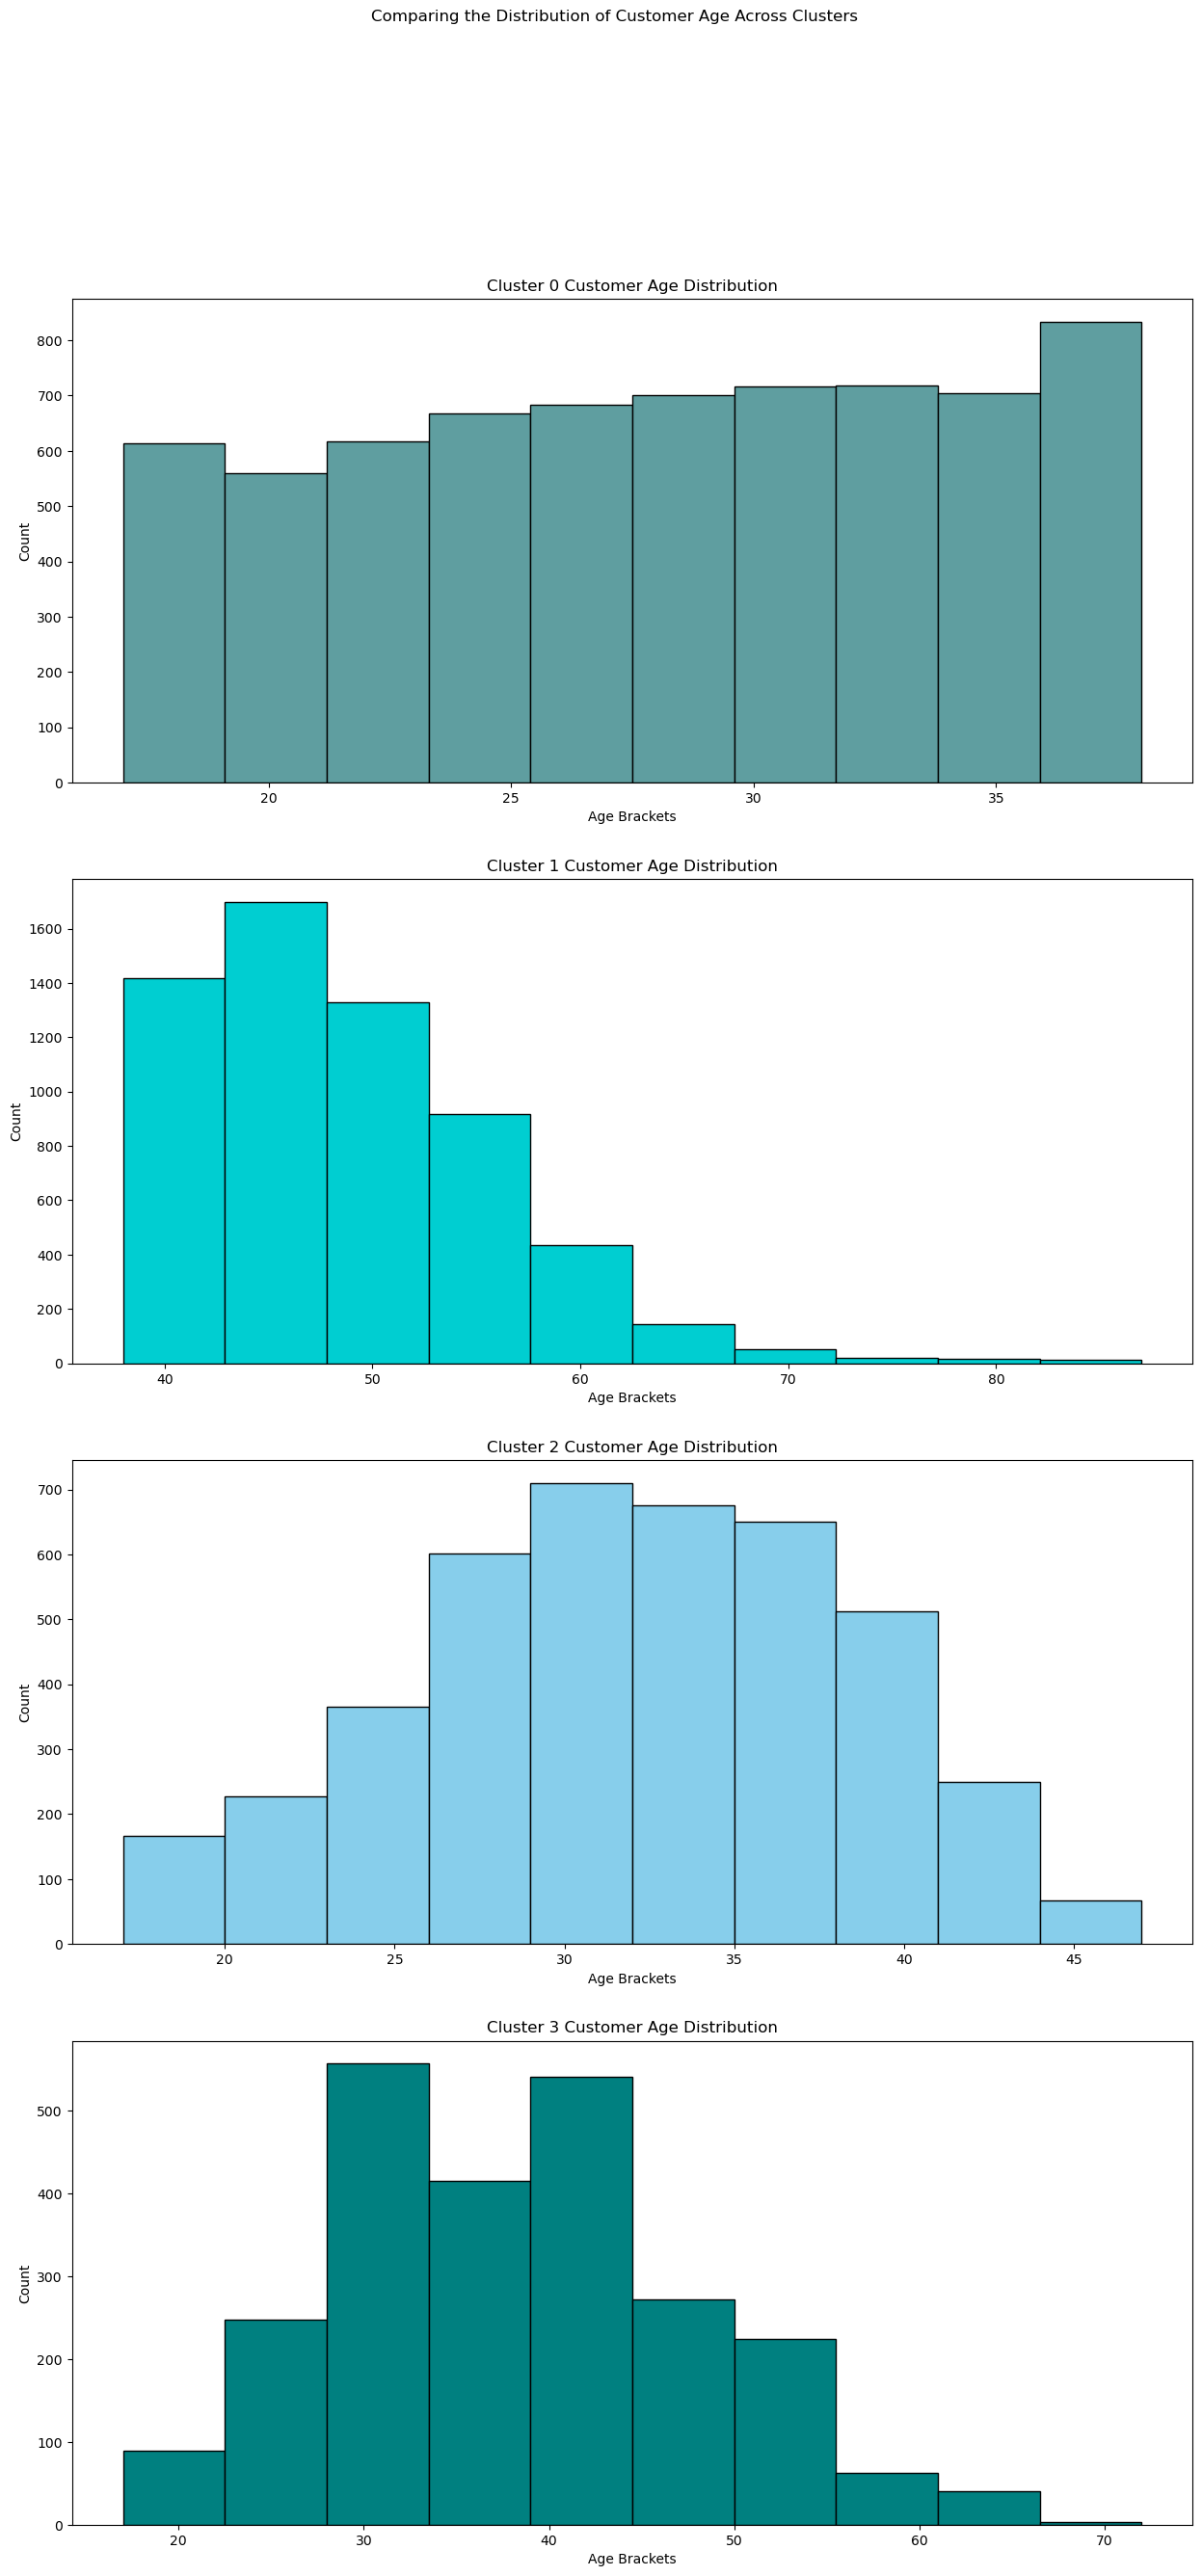

In [18]:
fig, axs = plt.subplots(4, 1, figsize=(15, 30))

axs[0].hist(clus_0.customer_age, color='cadetblue', ec='black')
axs[1].hist(clus_1.customer_age, color='darkturquoise', ec='black')
axs[2].hist(clus_2.customer_age, color='skyblue', ec='black')
axs[3].hist(clus_3.customer_age, color='teal', ec='black')

fig.suptitle("Comparing the Distribution of Customer Age Across Clusters")
axs[0].set_title('Cluster 0 Customer Age Distribution')
axs[1].set_title('Cluster 1 Customer Age Distribution')
axs[2].set_title('Cluster 2 Customer Age Distribution')
axs[3].set_title('Cluster 3 Customer Age Distribution')

axs[0].set_xlabel('Age Brackets')
axs[0].set_ylabel('Count')
axs[1].set_xlabel('Age Brackets')
axs[1].set_ylabel('Count')
axs[2].set_xlabel('Age Brackets')
axs[2].set_ylabel('Count')
axs[3].set_xlabel('Age Brackets')
axs[3].set_ylabel('Count')

plt.show()

**Question 3:**  Is there a relationship between age and/or gender and sub category purchased?

Looking at age and sub category first.

- H$_0$ - There is no relationship between age and the sub catgory of items purchased.
- H$_a$ - There is a linear relationship between age and the sub category of items purchased.

    Age is right-skewed continuous, and sub_category is categorical
    
    We will be using an ANOVA test

In [19]:
# create a list of sub_categories
cat_list = train.sub_category.unique()

In [20]:
# lets group each sub_category
for i in range(len(cat_list)):
    cat_i = train[train.sub_category == cat_list[i]]

In [21]:
# check if customer_age variances are equal among each cluster
# we will be using a levene test to check if variances are equal
# p-value < 0.05 indicates equal variaces
for i in range(len(cat_list)):
    print(f'''sub_category {cat_list[i]} varaince to total: {stats.levene(
             train[train.sub_category == cat_list[i] ].customer_age,
             train.customer_age)}''')

sub_category Tires and Tubes varaince to total: LeveneResult(statistic=73.60092695099458, pvalue=1.0092111912462466e-17)
sub_category Road Bikes varaince to total: LeveneResult(statistic=99.30968090343778, pvalue=2.4310018350545582e-23)
sub_category Helmets varaince to total: LeveneResult(statistic=0.05507582464337325, pvalue=0.8144574489386264)
sub_category Caps varaince to total: LeveneResult(statistic=0.35001978818006385, pvalue=0.5541084822434728)
sub_category Bottles and Cages varaince to total: LeveneResult(statistic=1.0395312097372216, pvalue=0.30794148770455376)
sub_category Jerseys varaince to total: LeveneResult(statistic=0.12031336437539432, pvalue=0.7286984069478549)
sub_category Vests varaince to total: LeveneResult(statistic=0.005246397922073336, pvalue=0.9422588374055193)
sub_category Hydration Packs varaince to total: LeveneResult(statistic=1.17182864495456, pvalue=0.27903904511501826)
sub_category Cleaners varaince to total: LeveneResult(statistic=0.07407498988657955, 

    ** COMING SOON **

Now looking at gender and sub category.

- H$_0$ - There is no relationship between gender and the sub catgory of items purchased.
- H$_a$ - There is a linear relationship between gender and the sub category of items purchased.

    Age is right-skewed continuous, and sub_category is categorical
    
    We will be using an ANOVA test
    
    **

In [22]:
def get_count_gender():
    ''' Gets boxplots of acquired continuous variables'''

    cluster_0 = train[train.clusters == 0]
    cluster_1 = train[train.clusters == 1]
    cluster_2 = train[train.clusters == 2]
    cluster_3 = train[train.clusters == 3]
    
    clusters = [cluster_0, cluster_1, cluster_2, cluster_3]
    
    plt.figure(figsize=(5, 25))

    for i, cluster in enumerate(clusters):
        
        plot_number = i + 1 
        
        # Create subplot.
        plt.subplot(len(clusters), 1, plot_number)

        # Title with column name.
        plt.title(f'Comparing Counts of Transactions by Gender for cluster_{i}')

        # Display boxplot for column.
        sns.countplot(x=cluster['customer_gender'], hue=cluster['product_category'], palette='crest')

        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
        # Hide gridlines.
        plt.grid(False)

    plt.show()

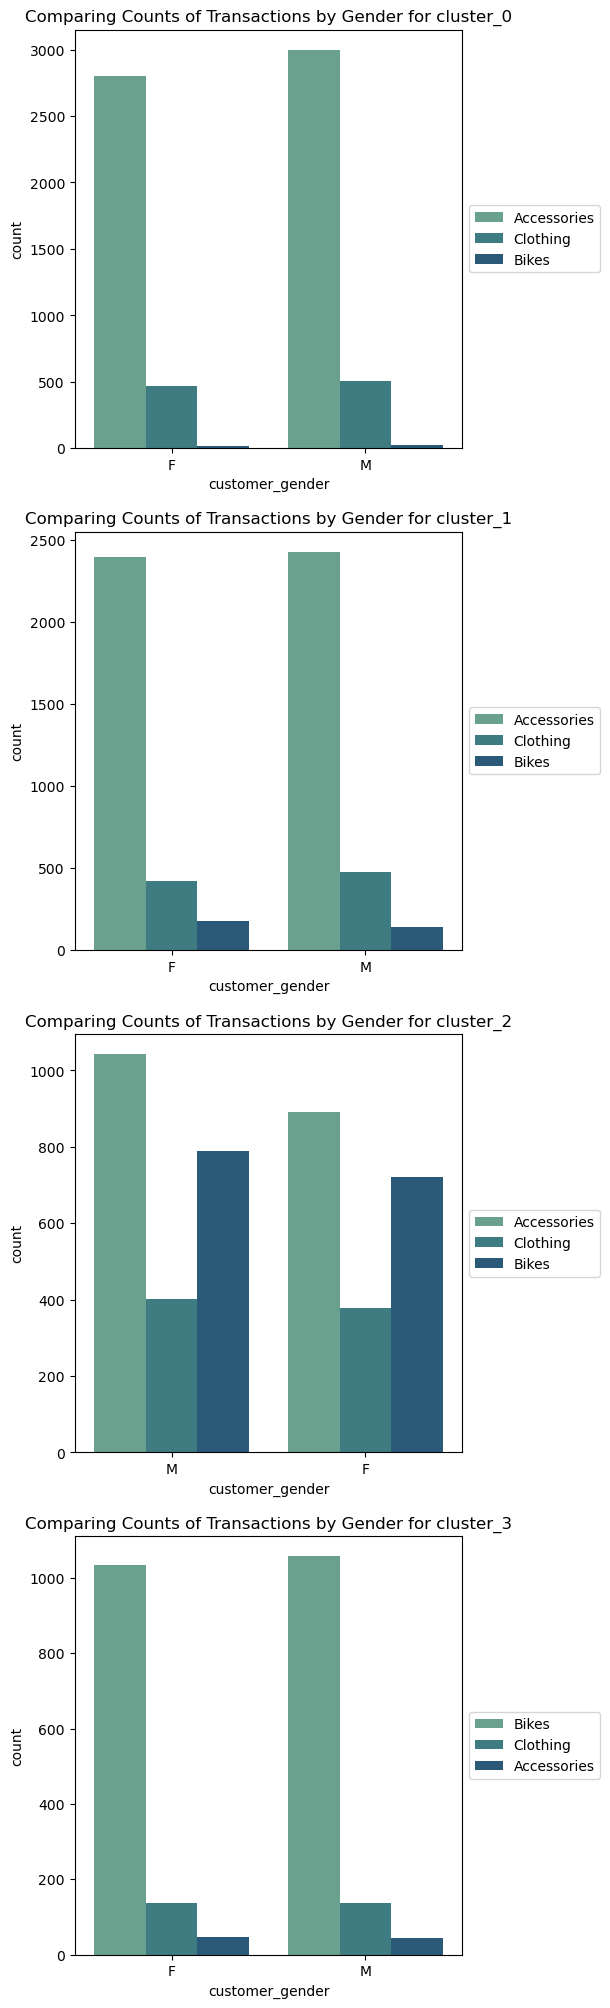

In [23]:
get_count_gender()

**Question 4:**  Between road, mountain, and touring bikes, are customers in specific geographical areas buying more of these types of bikes? Does the age differ between the customers who purchase these types of bikes? Do people of different gender purchase one type of bike more than the other?

In [24]:
# ** COMING SOON **

**Question 5:** Proportional to a nation's population, does one country purchase more items than the others? What are they buying if so, and how much are they spending?

In [25]:
# ** COMING SOON **

**Question 6:** What are the distinct characteristics of the four clusters of customers? What is the most influential driver(s) of segmenting customers?

In [26]:
# ** COMING SOON **

## Exploration Summary

In analyzing age and budget across the four segments of customers, it seems that KMeans has identified distinct groups:

    Group 0:  Low budget and the youngest group (twenties)
    Group 1:  Mid-Low budget and the oldest group (forties)
    Group 2:  Mid-High budget and early thirties (early thirties)
    Group 3:  High budget and late thirties (late thirties)

## Modeling

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In [27]:
# Reloading k clusters and resplitting scaled/encoded train, validate, test

train, validate, test = w.split_data(w.k_means_clustering(k=4))

Opening data from local file.
Cluster 1 Mean:
customer_age                       28.105851
sub_category_Bike Stands            0.001808
sub_category_Bottles and Cages      0.254438
sub_category_Caps                   0.076677
sub_category_Cleaners               0.024737
sub_category_Fenders                0.019888
sub_category_Gloves                 0.012410
sub_category_Helmets                0.048159
sub_category_Hydration Packs        0.004356
sub_category_Jerseys                0.024901
sub_category_Mountain Bikes         0.003698
sub_category_Road Bikes             0.001890
sub_category_Shorts                 0.005999
sub_category_Socks                  0.017751
sub_category_Tires and Tubes        0.499178
sub_category_Touring Bikes          0.000247
sub_category_Vests                  0.002794
revenue                           179.097304
dtype: float64

Cluster 2 Mean:
customer_age                       48.486637
sub_category_Bike Stands            0.003155
sub_category_Bottles a

Printout should read: <br>
Baseline: "number" "evaluation metric"

Using the following Decision Tree Classifier is the only model which we have made thus far for predicting the customer segment based on the demographic and transaction data per transaction.

In [28]:
value_counts = train.clusters.value_counts()

In [29]:
m.find_baseline_and_eval_df()

,Accuracy,Precision,Recall,F1 Score
0,0.349775,0.087444,0.25,0.129568


In [30]:
m.find_dt_best_model_by_recall_difference(max_depth_range=10)

(DecisionTreeClassifier(max_depth=10),
 Max Depth            10.000000
 Train_Accuracy        0.997388
 Train_Precision       0.997281
 Train_Recall          0.997768
 Train_F1_Score        0.997522
 Val_Accuracy          0.984465
 Val_Precision         0.984585
 Val_Recall            0.983570
 Val_F1_Score          0.984067
 Recall_Difference     0.014198
 Name: 9, dtype: float64)

In [31]:
m.find_rf_best_model_by_recall_difference()

(RandomForestClassifier(max_depth=6, min_samples_leaf=5),
 Max Depth            6.000000
 Min Leaf             5.000000
 Train_Accuracy       0.967681
 Train_Precision      0.965953
 Train_Recall         0.967111
 Train_F1 Score       0.966507
 Val_Accuracy         0.965822
 Val_Precision        0.963883
 Val_Recall           0.963728
 Val_F1 Score         0.963781
 Recall_Difference    0.003383
 Name: 49, dtype: float64)

In [32]:
m.test_decision_tree(max_depth=10)

,Max_Depth,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1-Score
0,10.0,0.997439,0.99734,0.997809,0.997572,0.986665,0.986164,0.986327,0.986238


## You may use this as a template for how to introduce your models:

### Model Type

In [33]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [34]:
# Code that runs the best overall model on test data (this may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summery
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**

# README

Your README should contain all of the following elements:

* **Title** Gives the name of your project
* **Project Description** Describes what your project is and why it is important 
* **Project Goal** Clearly states what your project sets out to do and how the information gained can be applied to the real world
* **Initial Hypotheses** Initial questions used to focus your project 
* **Project Plan** Guides the reader through the different stages of the pipeline as they relate to your project
* **Data Dictionary** Gives a definition for each of the features used in your report and the units they are measured in, if applicable
* **Steps to Reproduce** Gives instructions for reproducing your work. i.e. Running your notebook on someone else's computer.